In [ ]:
MOUNTED = False
if not MOUNTED:
  # mount google drive
  from google.colab import drive
  drive.mount('/content/drive')
  MOUNTED = True

Mounted at /content/drive


In [ ]:
##---------------------------##
## AN8002 GROUP PROJECT
##---------------------------##

import pandas as pd

raw_data = pd.read_csv('/content/drive/MyDrive/AN8002/8002 Group/credit_train.csv')
raw_data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Data Cleaning

## get an idea how the data looks like
finding tails are NaN

In [ ]:
print(raw_data.head(), raw_data.tail())

                                Loan ID  ... Tax Liens
0  14dd8831-6af5-400b-83ec-68e61888a048  ...       0.0
1  4771cc26-131a-45db-b5aa-537ea4ba5342  ...       0.0
2  4eed4e6a-aa2f-4c91-8651-ce984ee8fb26  ...       0.0
3  77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a  ...       0.0
4  d4062e70-befa-4995-8643-a0de73938182  ...       0.0

[5 rows x 19 columns]        Loan ID Customer ID  ... Bankruptcies  Tax Liens
100509     NaN         NaN  ...          NaN        NaN
100510     NaN         NaN  ...          NaN        NaN
100511     NaN         NaN  ...          NaN        NaN
100512     NaN         NaN  ...          NaN        NaN
100513     NaN         NaN  ...          NaN        NaN

[5 rows x 19 columns]


## removing NaN

In [ ]:
# see the NaN values
raw_data.isna().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [ ]:
raw_data.tail(514).isna().sum()

Loan ID                         514
Customer ID                     514
Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

In [ ]:
raw_data.dropna(inplace=True, how='all')
raw_data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
raw_data.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [ ]:
data = raw_data.drop(['Loan ID', 'Customer ID'], axis=1)

In [ ]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
data.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

## remove outliers

In [ ]:
data.drop(data[data['Current Credit Balance'] > 10**7].index, inplace=True)

In [ ]:
data['Current Loan Amount'].value_counts()

99999999.0    11484
223652.0         27
223322.0         27
216194.0         27
223102.0         27
              ...  
602008.0          1
457864.0          1
601986.0          1
95216.0           1
114686.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64

In [ ]:
data.drop(data[data['Current Loan Amount'] == 99999999.0].index, inplace=True)

In [ ]:
data['Credit Score'] = data['Credit Score'].apply(lambda x: x / 10 if x > 850 else x)

## one hot encoding columns
- `Term` 
- `Years in current job` 
- `Home Ownership`
- `Purpose`

In [ ]:
data = pd.concat([data, pd.get_dummies(data.Term, prefix='Term')], axis=1)
data.drop(['Term'], axis=1, inplace=True)
# df_features.head()

In [ ]:
data = pd.concat([data, pd.get_dummies(data['Years in current job'], prefix='Job_year')], axis=1)
data.drop(['Years in current job'], axis=1, inplace=True)

In [ ]:
# merge HaveMortgage
data['Home Ownership'] = data['Home Ownership'].apply(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)

In [ ]:
data = pd.concat([data, pd.get_dummies(data['Home Ownership'], prefix='Home')], axis=1)
data.drop(['Home Ownership'], axis=1, inplace=True)

In [ ]:
# merge Other and other in purpose column
data['Purpose'] = data['Purpose'].apply(lambda x: 'Other' if x == 'other' else x)

In [ ]:
data = pd.concat([data, pd.get_dummies(data['Purpose'], prefix='Purpose')], axis=1)
data.drop(['Purpose'], axis=1, inplace=True)

In [ ]:
# drop credit and income na
data.dropna(subset=['Credit Score', 'Annual Income'], inplace=True)
data['Delinquent'] = data['Months since last delinquent'].isna().apply(lambda x: 0 if x else 1)
data.drop(['Months since last delinquent'], axis=1, inplace=True)
data.fillna(-1, inplace=True)

In [ ]:
data.isna().sum()

Loan Status                     0
Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Term_Long Term                  0
Term_Short Term                 0
Job_year_1 year                 0
Job_year_10+ years              0
Job_year_2 years                0
Job_year_3 years                0
Job_year_4 years                0
Job_year_5 years                0
Job_year_6 years                0
Job_year_7 years                0
Job_year_8 years                0
Job_year_9 years                0
Job_year_< 1 year               0
Home_Home Mortgage              0
Home_Own Home                   0
Home_Rent                       0
Purpose_Business Loan           0
Purpose_Buy Ho

In [ ]:
data.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Job_year_1 year,Job_year_10+ years,Job_year_2 years,Job_year_3 years,Job_year_4 years,Job_year_5 years,Job_year_6 years,Job_year_7 years,Job_year_8 years,Job_year_9 years,Job_year_< 1 year,Home_Home Mortgage,Home_Own Home,Home_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Delinquent
0,Fully Paid,445412.0,709.0,1167493.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Fully Paid,347666.0,721.0,806949.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Charged Off,206602.0,729.0,896857.0,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,Fully Paid,217646.0,730.0,1184194.0,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8,Fully Paid,548746.0,678.0,2559110.0,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69355 entries, 0 to 99998
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   69355 non-null  object 
 1   Current Loan Amount           69355 non-null  float64
 2   Credit Score                  69355 non-null  float64
 3   Annual Income                 69355 non-null  float64
 4   Monthly Debt                  69355 non-null  float64
 5   Years of Credit History       69355 non-null  float64
 6   Number of Open Accounts       69355 non-null  float64
 7   Number of Credit Problems     69355 non-null  float64
 8   Current Credit Balance        69355 non-null  float64
 9   Maximum Open Credit           69355 non-null  float64
 10  Bankruptcies                  69355 non-null  float64
 11  Tax Liens                     69355 non-null  float64
 12  Term_Long Term                69355 non-null  uint8  
 13  T

In [ ]:
features = ['Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']
target = ['Loan Status']

df_features = data.drop(target, axis=1).reset_index(drop=True)
df_features.to_csv('/content/drive/MyDrive/AN8002/8002 Group/df_features.csv')
df_target = data.loc[:, target].reset_index(drop=True)
df_target.to_csv('/content/drive/MyDrive/AN8002/8002 Group/df_target.csv')

In [ ]:
df_target['Loan Status'] = df_target.apply(lambda x: 0 if x.any() == 'Fully Paid' else 1, axis=1)
df_target

,Loan Status
0,0
1,0
2,1
3,0
4,0
...,...
69350,0
69351,0
69352,0
69353,0


In [ ]:
df_features.columns[25]

'Home_Own Home'

# Data Visualization

In [ ]:
# data_for_draw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AN8002 AI in Finance/Group Project/credit_train.csv")
data_for_draw = pd.read_csv("/content/drive/MyDrive/AN8002/8002 Group/credit_train.csv")
data_for_draw.shape

(100514, 19)

In [ ]:
# remove 514 rows with all na
data_for_draw.dropna(inplace=True, how='all')
# remove na with 'Credit Score' and 'Annual Income'
data_for_draw.dropna(subset = ['Credit Score', 'Annual Income'], inplace=True)
# remove anonaly in 'Current Loan Amount'
data_for_draw.drop(data_for_draw[data_for_draw['Current Loan Amount']== 99999999.0].index,inplace = True)
# merge "Home Mortgage" and "HaveMortgage" in the column "Home Ownership"
data_for_draw["Home Ownership"] = data_for_draw["Home Ownership"].apply(lambda x: 'Home Mortgage' if x == 'HaveMortgage' else x)
# merge "other" and "Other" in the column "Purpose"
data_for_draw["Purpose"] = data_for_draw["Purpose"].apply(lambda x: 'Other' if x == 'other' else x)


# without 0-1 dummy transformation

In [ ]:
# For Tableau
# data_for_draw.to_csv("/content/drive/MyDrive/Colab Notebooks/AN8002 AI in Finance/Group Project/data_for_draw.csv")

# Modelling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_features = pd.read_csv('/content/drive/MyDrive/AN8002/8002 Group/df_features.csv',index_col=0)
df_target = pd.read_csv('/content/drive/MyDrive/AN8002/8002 Group/df_target.csv',index_col=0)
df_target['Loan Status'] = df_target.apply(lambda x: 0 if x.any() == 'Fully Paid' else 1, axis=1)

y = df_target
x = df_features

# Balance dataset before train test split
# x = pd.DataFrame(x)
# y = pd.DataFrame(y)
# dataset = pd.merge(left=x,right=y,how='outer',left_index=True,right_index=True)

# print(len(dataset[dataset['Loan Status']==1]))
# print(len(dataset[dataset['Loan Status']==0]))
# df_0 = dataset[dataset['Loan Status']==0]
# df_1 = dataset[dataset['Loan Status']==1]
# df_0_sample = df_0.sample(n=len(df_1),random_state=8002)
# df_final = df_0_sample.append(df_1)
# from sklearn.utils import shuffle
# dataset = shuffle(df_final)
# dataset.reset_index(drop=True,inplace=True)
# y = dataset.iloc[:,-1]
# x = dataset.iloc[:,:-1].to_numpy()

scaler = MinMaxScaler().fit(x) 
scaled_x = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y.to_numpy(), test_size=0.2, random_state=2020)

In [5]:
y.value_counts()

Loan Status
0              52152
1              17210
dtype: int64

trainset balance only

In [6]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
train = pd.merge(left=x_train,right=y_train,how='outer',left_index=True,right_index=True)
# train

In [7]:
print(len(train[train['0_y']==1]))
print(len(train[train['0_y']==0]))
df_0 = train[train['0_y']==0]
df_1 = train[train['0_y']==1]
df_0_sample = df_0.sample(n=len(df_1),random_state=8002)
df_final = df_0_sample.append(df_1)
from sklearn.utils import shuffle
train = shuffle(df_final)
train.reset_index(drop=True,inplace=True)
y_train = train.iloc[:,-1].to_numpy()
x_train = train.iloc[:,:-1].to_numpy()

13789
41700


In [8]:
# import pandas as pd
# df_features = pd.read_csv('/content/drive/MyDrive/AN8002/8002 Group/df_features.csv',index_col=0)
# df_target = pd.read_csv('/content/drive/MyDrive/AN8002/8002 Group/df_target.csv',index_col=0)

# '''balanced data'''
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # df_target['Loan Status'] = df_target.apply(lambda x: 0 if x.any() == 'Fully Paid' else 1, axis=1)
# y = df_target.to_numpy()
# x = df_features
# n = sum(y)  # sample balance
# index = np.random.choice(list(range(len(y[y==0]))),n)
# sample = x[y==0].iloc[index,:]
# y_sample = y[y==0][index]
# df = pd.concat([x.loc[y==1,],sample])
# Y = np.append(y[y==1],y_sample)
# print(df.shape)
# print(Y.shape)

# scaler = MinMaxScaler().fit(df) 
# scaled_x = scaler.transform(df)
# x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(scaled_x), pd.DataFrame(Y), test_size=0.3, random_state=2020)

# print(x_train.shape)
# print(x_test.shape)
# print(x.head())

## Logistic Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, r2_score

logistic_classifier = linear_model.LogisticRegression(random_state=2020)

param_lr = {
              "C":list(np.arange(0,1.01,0.1)), 
              "penalty":["l1","l2"],
              "max_iter":[500]
              }

bst = GridSearchCV(logistic_classifier, param_lr, n_jobs=5, 
                   scoring = "accuracy", cv = 5, refit = True)

print('Trainset shape: ',x_train.shape)
bst.fit(x_train,y_train)

print(bst.best_params_)
y_pred = bst.predict(x_test)
cm_lr_test = confusion_matrix(y_test, y_pred)
score_lr_train = accuracy_score(bst.predict(x_train),y_train)
score_lr_test = accuracy_score(y_pred,y_test)
print(f'Accuracy for trainset: {score_lr_train}')
print(f'Accuracy for testset: {score_lr_test}')
recall_lr_score = recall_score(y_test,y_pred)

Trainset shape:  (27578, 43)
{'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
Accuracy for trainset: 0.6431213285952571
Accuracy for testset: 0.7621278742881857


In [ ]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

logistic_classifier = linear_model.LogisticRegression(random_state=2020)

rfe = RFE(logistic_classifier, 10)
rfe = rfe.fit(x_train, y_train.ravel())
print(rfe.support_)
print(rfe.ranking_)


[False  True  True  True  True False  True  True False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False]
[25  1  1  1  1 23  1  1 24  1 26  1 27 11  5  9  3  2 10  7  4  6  8 12
 22 31 30 28 18 13 19 14 16 29 20 17 15 34  1  1 21 33 32]


In [ ]:
feature_list = []
for i in range(0,len(rfe.support_)):
  if rfe.support_[i]==True:
    feature_list.append(df_features.columns[i])
  else:
    pass
feature_list

['Credit Score', 'Annual Income', 'Purpose_small_business']

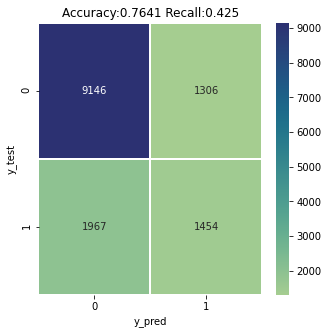

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm_lr_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_lr_test, 4)} Recall:{round(recall_lr_score,4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## Decision Tree

Accuracy for trainset: 1.0
Accuracy for testset: 0.6243062063000072


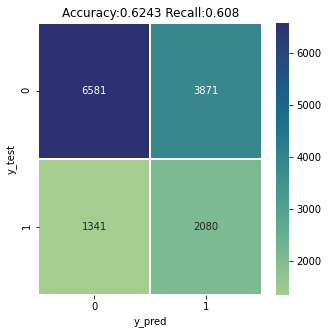

In [ ]:
# 1. build decision tree to the maximum
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

dt_classifier = tree.DecisionTreeClassifier(random_state=2020)
dt_classifier = dt_classifier.fit(x_train, y_train)

# plot confusion matrix to display the accuracy
y_pred = dt_classifier.predict(x_test)
cm_dt_test = confusion_matrix(y_test,y_pred)
score_dt_train = accuracy_score(dt_classifier.predict(x_train),y_train)
score_dt_test = accuracy_score(y_pred,y_test)
print(f'Accuracy for trainset: {score_dt_train}')
print(f'Accuracy for testset: {score_dt_test}')
recall_dt_score = recall_score(y_test,y_pred)

accuracy = accuracy_score(y_test, y_pred) * 100
#print(f"Accuracy: {accuracy:.2f}%")

# plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_dt_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_dt_test, 4)} Recall:{round(recall_dt_score,4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

# plot the tree
#tree.plot_tree(dt_classifier)


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

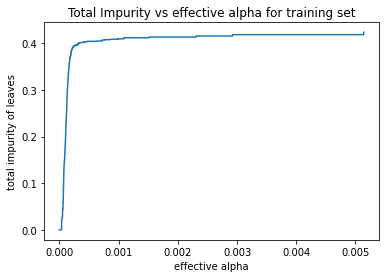

In [ ]:
# return the effective alphas and the corresponding total leaf impurities at each step of the pruning process
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
#print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}")

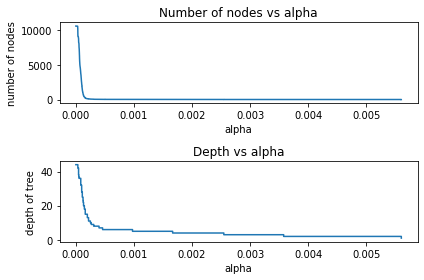

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

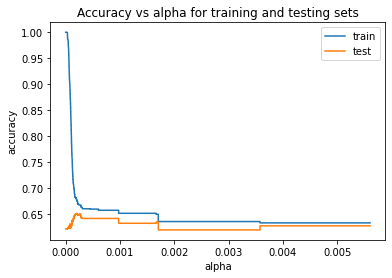

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
import numpy as np
i = np.arange(len(ccp_alphas))
ccp = pd.DataFrame({'Depth': pd.Series(depth,index=i),'Node' : pd.Series(node_counts, index=i),\
                    'ccp' : pd.Series(ccp_alphas, index = i),'train_scores' : pd.Series(train_scores, index = i),
                   'test_scores' : pd.Series(test_scores, index = i)})
ccp.tail()
ccp[ccp['test_scores']==ccp['test_scores'].max()]

,Depth,Node,ccp,train_scores,test_scores
2597,13,111,0.000204,0.676315,0.651511
2598,13,109,0.000204,0.676315,0.651511


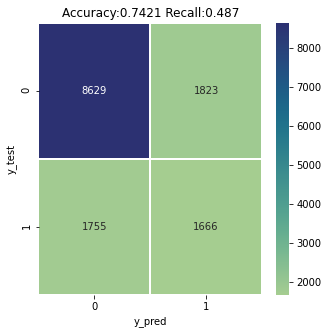

In [ ]:
# optimized decision tree with optimal cp value
clf = tree.DecisionTreeClassifier(random_state=2020, ccp_alpha=0.000204) #0.000204
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cm_dt_test = confusion_matrix(y_test,y_pred)
score_dt_train = accuracy_score(clf.predict(x_train),y_train)
score_dt_test = accuracy_score(y_pred,y_test)
# print(f'Accuracy for trainset: {score_dt_train}')
# print(f'Accuracy for testset: {score_dt_test}')
recall_dt_score = recall_score(y_test,y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_dt_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_dt_test, 4)} Recall:{round(recall_dt_score,4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

# plot the tree
# tree.plot_tree(dt_classifier)

## Random Forest

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 500}
Accuracy for trainset: 0.6931249546740155
Accuracy for testset: 0.751892164636344


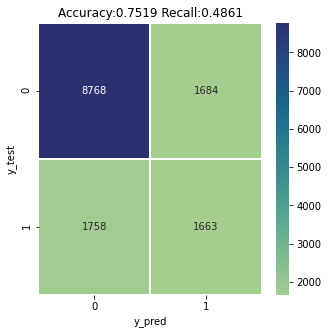

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_params = [{
    'max_depth' : list(range(4,11,2)),
    'criterion' : ['gini','entropy'],
    'n_estimators': [500]}]
GS_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced_subsample',random_state=2020), rf_params, scoring = "accuracy", cv = 5, refit = True)
GS_rf.fit(x_train, y_train)

print(GS_rf.best_params_)
y_pred = GS_rf.predict(x_test)
cm_rf_test = confusion_matrix(y_test, y_pred)
score_rf_train = accuracy_score(GS_rf.predict(x_train),y_train)
score_rf_test = accuracy_score(y_pred,y_test)
print(f'Accuracy for trainset: {score_rf_train}')
print(f'Accuracy for testset: {score_rf_test}')
recall_rf_score = recall_score(y_test,y_pred)

import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm_rf_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_rf_test, 4)} Recall:{round(recall_rf_score,4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()
# plot_feature_importance(GS_rf.best_estimator_.feature_importances_,x.columns)
# plt.show()

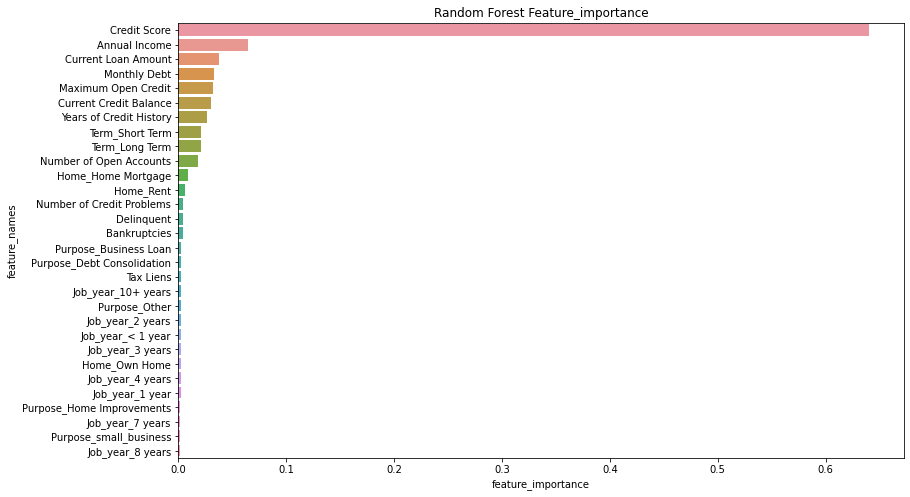

In [ ]:
plot_feature_importance(GS_rf.best_estimator_.feature_importances_,x.columns)
plt.show()

## GaussianNB

In [ ]:
from sklearn import svm


rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(x_train, y_train)
y_predicted = rbf_svc.predict(x_test)
y_pred_train = rbf_svc.predict(x_train)
cm_train = confusion_matrix(y_train,y_train)
print("================================")
print("Training confusion matrix: ")
print(cm_train)
acc_train = (cm_train[0,0] + cm_train[1,1]) / sum(sum(cm_train))
print("TrainSet: Accurarcy %.2f%%" % (acc_train*100))
print("================================")
y_pred = rbf_svc.predict(x_test)
cm_test = confusion_matrix(y_test,y_pred)
print(cm_test)
acc_test = (cm_test[0,0] + cm_test[1,1]) / sum(sum(cm_test))
print("Testset: Accurarcy %.2f%%" % (acc_test*100))
print("================================")

Training confusion matrix: 
[[13735     0]
 [    0 13735]]
TrainSet: Accurarcy 100.00%
[[5731 4666]
 [1527 1947]]
Testset: Accurarcy 55.35%


Trainset shape:  (27470, 43)
{'var_smoothing': 0.1}
Accuracy for trainset: 0.5541317801237714
Accuracy for testset: 0.6132939225722731


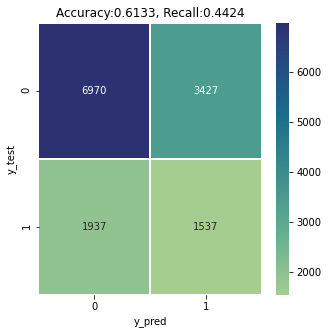

In [ ]:

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=10)}

gd_gnb = GridSearchCV(gnb, params_NB, n_jobs=5, 
                   scoring = "accuracy", cv = 5, refit = True)

print('Trainset shape: ',x_train.shape)
gd_gnb.fit(x_train,y_train)

print(gd_gnb.best_params_)
y_pred = gd_gnb.predict(x_test)
cm_gnb_test = confusion_matrix(y_test, y_pred)
score_gnb_train = accuracy_score(gd_gnb.predict(x_train),y_train)
score_gnb_test = accuracy_score(y_pred,y_test)
print(f'Accuracy for trainset: {score_gnb_train}')
print(f'Accuracy for testset: {score_gnb_test}')
recall_gnb_score = recall_score(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm_gnb_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_gnb_test, 4)}, Recall:{round(recall_gnb_score, 4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

## Xgboost

Trainset shape:  (27578, 43)
{'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 500, 'objective': 'binary:logistic'}
Accuracy for trainset: 0.6946479077525564
Accuracy for testset: 0.7335832192027679


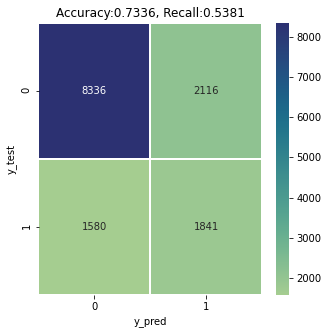

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, r2_score

xgbmodel = xgb.XGBClassifier(randome_state=2020)
param_xgb = {
              'objective':['binary:logistic'],
              'learning_rate': [0.04], #so called `eta` value
              'max_depth': [3,4,5],
              # 'min_child_weight': [],
              # 'silent': [0],
              # 'subsample': [0.8],
              # 'colsample_bytree': [0.7],
              'n_estimators': [500] #number of trees
              }

bst = GridSearchCV(xgbmodel, param_xgb, n_jobs=5, 
                   scoring = "accuracy", cv = 5, refit = True)

print('Trainset shape: ',x_train.shape)
bst.fit(x_train,y_train)

print(bst.best_params_)
y_pred = bst.predict(x_test)
cm_xgb_test = confusion_matrix(y_test, y_pred)
score_xgb_train = accuracy_score(bst.predict(x_train),y_train)
score_xgb_test = accuracy_score(y_pred,y_test)
print(f'Accuracy for trainset: {score_xgb_train}')
print(f'Accuracy for testset: {score_xgb_test}')
recall_xgb_score = recall_score(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm_xgb_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_xgb_test, 4)}, Recall:{round(recall_xgb_score, 4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

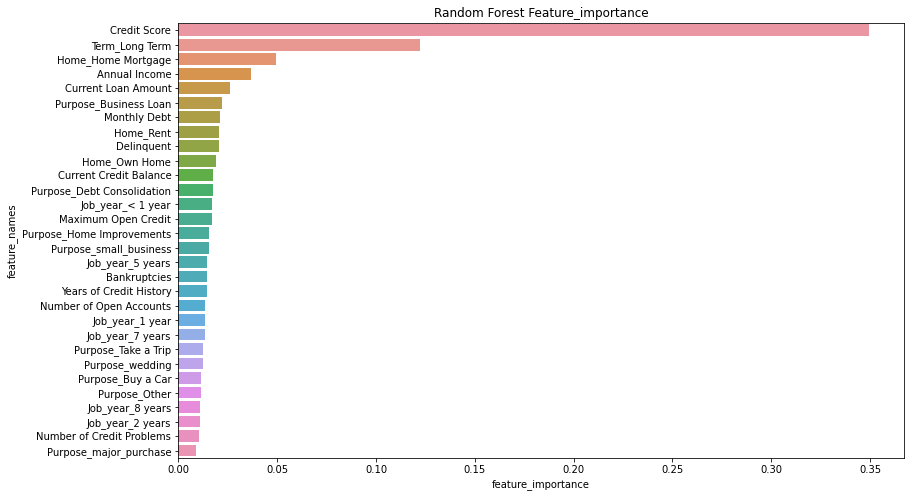

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names):

    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':importance}
    featureimportance_df = pd.DataFrame(data).sort_values(by=['feature_importance'], ascending=False)
    featureimportance_df_filter = featureimportance_df.iloc[:30,:]
    plt.figure(figsize=(13,8))
    sns.barplot(x=featureimportance_df_filter['feature_importance'], y=featureimportance_df_filter['feature_names'])
    plt.title('Random Forest Feature_importance')
    plt.xlabel('feature_importance')
    plt.ylabel('feature_names')
    plt.show()

# plot_feature_importance(model3.feature_importances_,x.columns)
plot_feature_importance(bst.best_estimator_.feature_importances_,x.columns)
plt.show()

## Ensemble

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import xgboost as xgb
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models
        
    def fit_predict(self, X, y, T,increase = True):
        print(X.shape)
        if increase:
            pos = y[y.to_numpy() == 1].index
            # print(len(pos))
            X = pd.concat([X, X.loc[pos]], axis = 0)
            y = pd.concat([y, y.loc[pos]], axis = 0)
            X = pd.concat([X, X.loc[pos]], axis = 0)
            y = pd.concat([y, y.loc[pos]], axis = 0)
            idx = np.arange(len(X))
            np.random.shuffle(idx)
            X = X.iloc[idx]
            y = y.iloc[idx]
        print(X.shape)
        print(y.value_counts())
        # print(sum(1*(y.to_numpy()==1)))
        print(T.shape)
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)
        
        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle = True, random_state=17).split(X, y))
        
        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        
        
        
        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((T.shape[0], self.n_splits))
            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]

                print("fit %s fold %d " %(str(clf).split('(')[0], j+1))
                clf.fit(X_train, y_train)
                y_pred = clf.predict_proba(X_holdout)[:, 1]

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict_proba(T)[:, 1]
                S_test[:, i] = S_test_i.mean(axis=1)

                folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle = True, random_state=17).split(X, y))

            # each model average prediciton value
        result = cross_val_score(self.stacker, S_train, y, cv=3)
        print("Stacker score : %.5f "%(result.mean()))
        self.stacker.fit(S_train, y)
        print(S_train)
        acc = accuracy_score(self.stacker.predict(S_train),y)
        print('acc: ',acc)
        print(S_test)
        res = self.stacker.predict(S_test)
        return res, S_test
        

In [10]:
param_xgb = {
              'objective':'binary:logistic',
              'learning_rate': 0.04, #so called `eta` value
              'max_depth': 3,
              # 'min_child_weight': [],
              # 'silent': [0],
              # 'subsample': [0.8],
              # 'colsample_bytree': [0.7],
              'n_estimators': 500 #number of trees
              }
xgbmodel = xgb.XGBClassifier(**param_xgb)
rf_params = {
    'max_depth' :10,
    'criterion' : 'entropy',
    'n_estimators': 500}
rfmodel = RandomForestClassifier(**rf_params)
from sklearn import linear_model
lr_param = {
              "C":1.0, 
              "penalty":"l2",
              "max_iter":500
              }
logistic_classifier = linear_model.LogisticRegression(**lr_param)
dt_param = {
              "ccp_alpha":0.000204
              }
clf = tree.DecisionTreeClassifier(**dt_param)

# x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(x), pd.DataFrame(y), test_size=0.2, random_state=2020)

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
log_model = linear_model.LogisticRegression()
stack = Ensemble(n_splits = 3, stacker = log_model, base_models = (xgbmodel, rfmodel, logistic_classifier,clf))

increase = True
if increase == True:
    x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame(x), pd.DataFrame(y), test_size=0.2, random_state=2020)
y_pred, S_test = stack.fit_predict(pd.DataFrame(x_train), pd.DataFrame(y_train), pd.DataFrame(x_test),increase)

(55489, 43)
(96856, 43)
Loan Status
1              55156
0              41700
dtype: int64
(13873, 43)
fit XGBClassifier fold 1 


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit XGBClassifier fold 2 


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit XGBClassifier fold 3 


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit RandomForestClassifier fold 1 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


fit RandomForestClassifier fold 2 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


fit RandomForestClassifier fold 3 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


fit LogisticRegression fold 1 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit LogisticRegression fold 2 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit LogisticRegression fold 3 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fit DecisionTreeClassifier fold 1 
fit DecisionTreeClassifier fold 2 
fit DecisionTreeClassifier fold 3 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stacker score : 0.68326 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.4923085  0.49660704 0.54044748 0.45311496]
 [0.99962509 0.9206097  0.9871805  1.        ]
 [0.6716277  0.64110355 0.55444575 0.68988614]
 ...
 [0.59094262 0.54648785 0.47755246 0.61950395]
 [0.54829097 0.57994661 0.53720202 0.68988614]
 [0.58224285 0.59344974 0.5768065  0.68766637]]
acc:  0.6829829850499711
[[0.56709862 0.6115648  0.56204431 0.55256022]
 [0.50540883 0.49064789 0.53392362 0.60610466]
 [0.7175497  0.68189228 0.58166655 0.7026084 ]
 ...
 [0.20263491 0.32075037 0.5016775  0.32031909]
 [0.62956309 0.51834982 0.5805446  0.65251178]
 [0.58201212 0.61583868 0.47771437 0.57845891]]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
print(accuracy_score(y_test, (S_test[:,0]>0.5)*1))
print(recall_score(y_test, (S_test[:,0]>0.5)*1))
confusion_matrix(y_test, (S_test[:,0]>0.5)*1)

0.7371873423196137
0.5285004384682841


array([[8419, 2033],
       [1613, 1808]])

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
print(accuracy_score(y_test, (S_test[:,1]>0.5)*1))
print(recall_score(y_test, (S_test[:,1]>0.5)*1))
confusion_matrix(y_test, (S_test[:,1]>0.5)*1)

0.7505946803142796
0.4899152294650687


array([[8737, 1715],
       [1745, 1676]])

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
print(accuracy_score(y_test, (S_test[:,2]>0.5)*1))
print(recall_score(y_test, (S_test[:,2]>0.5)*1))
confusion_matrix(y_test, (S_test[:,2]>0.5)*1)

0.7589562459453615
0.42969891844489916


array([[9059, 1393],
       [1951, 1470]])

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
print(accuracy_score(y_test, (S_test[:,3]>0.5)*1))
print(recall_score(y_test, (S_test[:,3]>0.5)*1))
confusion_matrix(y_test, (S_test[:,3]>0.5)*1)

0.7058314712030563
0.5513007892429115


array([[7906, 2546],
       [1535, 1886]])

0.7172925827146255
0.5814089447529962


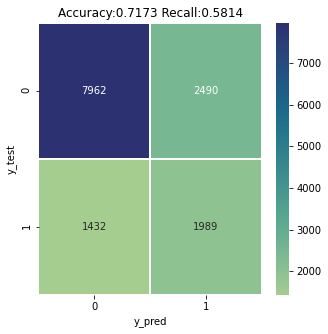

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

score_em_test = accuracy_score(y_test, y_pred)
recall_em_score = recall_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
cm_em_test = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm_em_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_em_test, 4)} Recall:{round(recall_em_score,4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

0.6395876883154329
0.6881028938906752


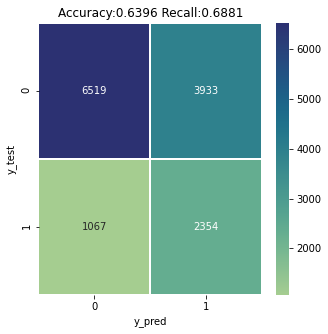

In [12]:
# imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

score_em_test = accuracy_score(y_test, y_pred)
recall_em_score = recall_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
cm_em_test = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm_em_test, annot=True, linewidth=0.5, fmt='.0f', cmap='crest')
plt.title(f'Accuracy:{round(score_em_test, 4)} Recall:{round(recall_em_score,4)}')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()